# Online Retails Purchase

**Dataset**: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv

**Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in jupyter notebook
%matplotlib inline 
sns.set(style='ticks') # set seaborn graphs to a better style

**Import the dataset from the internet, and assign it to a variable**

Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [9]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_retail = pd.read_csv(url, encoding='latin1')
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<font color=blue>**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


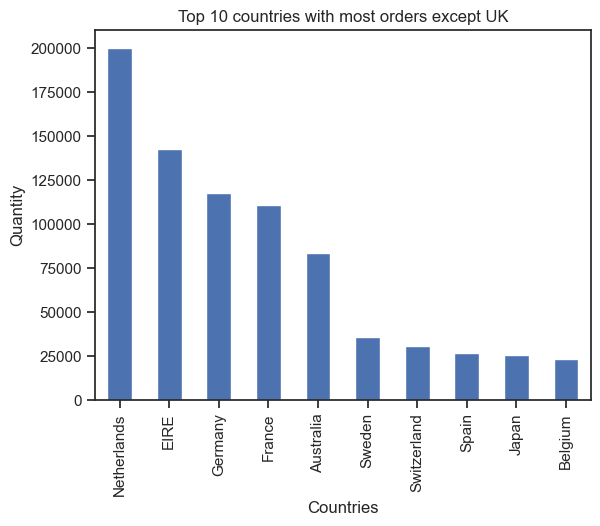

In [11]:
countries_order = online_rl.groupby('Country').Quantity.sum().sort_values(ascending=False)
print(countries_order)

# Create the plot
countries_order[1:11].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('Top 10 countries with most orders except UK')
plt.show()

**Exclude negative Quantity entries**

In [16]:
online_retail = online_retail[online_retail['Quantity'] > 0]
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<font color=blue>**Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)**

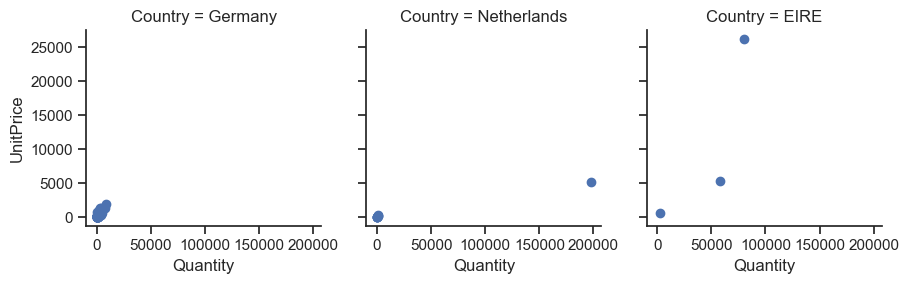

In [28]:
# groupby
customers_countries = online_retail.groupby(['CustomerID', 'Country']).sum()

# there is an outlier with negative UnitPrice
customers_countries = customers_countries[customers_countries['UnitPrice'] > 0]
# print(customers_countries)

# get the value of the index 'Country' and set it in the column 'Country'
customers_countries['Country'] = customers_countries.index.get_level_values(1)
# print(customers_countries)

# filter to select top 3 countries except UK
customers_countries = customers_countries[customers_countries.Country.isin(['Netherlands', 'EIRE', 'Germany'])]
# print(customers_countries)

# create the FacetGrid
fig = sns.FacetGrid(customers_countries, col='Country');
fig.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1);
fig.add_legend();

**Go back to the first line of previous cell. Display the first few rows of customers_countries DataFrame**

In [30]:
# groupby
customers_countries = online_retail.groupby(['CustomerID', 'Country']).sum()
customers_countries.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


**Think about what that piece of code does and display the dtype of `UnitPrice`**

In [32]:
customers_countries.UnitPrice.dtypes

# we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

dtype('float64')

**Pull data from `online_retail`for `CustomerID`s 12346.0 and 12347.0**

In [37]:
display(online_retail[online_retail.CustomerID == 12346.0].sort_values('Quantity', ascending=False).head())

online_retail[online_retail.CustomerID == 12347.0].sort_values('Quantity', ascending=False).head()

#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
148290,549222,23076,ICE CREAM SUNDAE LIP GLOSS,240,4/7/11 10:43,1.04,12347.0,Iceland
428974,573511,23084,RABBIT NIGHT LIGHT,48,10/31/11 12:25,1.79,12347.0,Iceland
148303,549222,22492,MINI PAINT SET VINTAGE,36,4/7/11 10:43,0.65,12347.0,Iceland
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,6/9/11 13:01,0.30,12347.0,Iceland
428983,573511,22492,MINI PAINT SET VINTAGE,36,10/31/11 12:25,0.65,12347.0,Iceland


To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

**Find out the top 3 countries in terms of sales volume**

In [48]:
sales_volume = online_retail.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] # NOTE: sales_volume is Series instead DataFrame, so sales_volume.loc[1:4] doesn't work
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

**Add a column to online_retail called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale**

In [47]:
online_retail['Revenue'] = online_retail['Quantity'] * online_retail['UnitPrice']
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


**Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit**

In [72]:
grouped = online_retail[online_retail.Country.isin(top3)].groupby(['CustomerID', 'Country'])

forplot = grouped[['Quantity','Revenue']].sum()
forplot['AvgPrice'] = forplot['Revenue'] / forplot['Quantity']
# get the value of Country index and put in the column Country
forplot['Country'] = forplot.index.get_level_values(1) #####
forplot.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


**Plot**

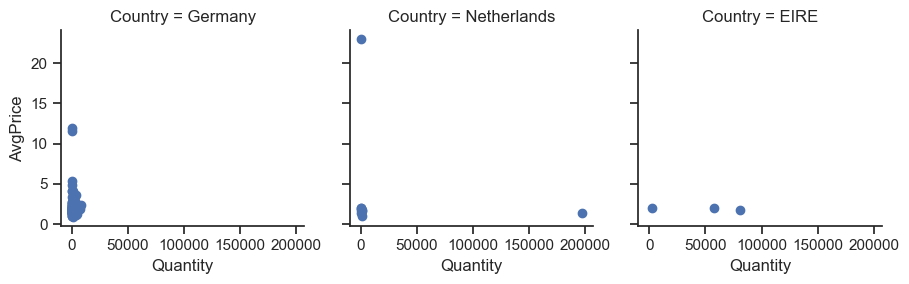

In [73]:
fig = sns.FacetGrid(forplot, col='Country')

fig.map(plt.scatter, 'Quantity', 'AvgPrice', alpha=1)
fig.add_legend();

We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

**Plot the data for each `CustomerID` on a single graph**

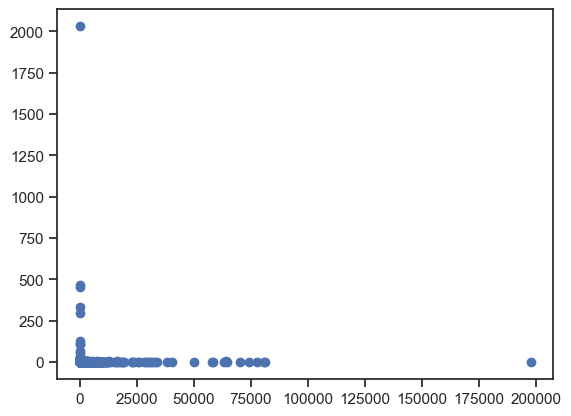

In [77]:
grouped = online_retail.groupby('CustomerID')
forplot = grouped[['Quantity', 'Revenue']].sum()
forplot['AvgPrice'] = forplot['Revenue'] / forplot['Quantity']

plt.scatter(forplot.Quantity, forplot.AvgPrice);

# Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

**Zoom in so we can see that curve more clearly**

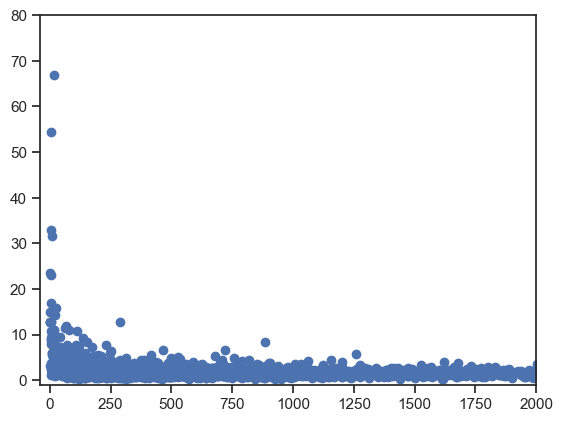

In [79]:
grouped = online_retail.groupby('CustomerID')
forplot = grouped[['Quantity', 'Revenue']].sum()
forplot['AvgPrice'] = forplot['Revenue'] / forplot['Quantity']

plt.scatter(forplot.Quantity, forplot.AvgPrice);

# zoom in
plt.xlim(-40, 2000)
plt.ylim(-1, 80);

The figure shows as average price increases, the quantity ordered decreses. 

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

**Plot a line chart showing revenue (y) per UnitPrice (x).**

<font color=blue>**Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`**

In [84]:
price_start = 0
price_end = 50
price_interval = 1
bins = np.arange(price_start, price_end, price_interval)
revenue_per_price = online_retail.groupby(pd.cut(online_retail.UnitPrice, bins)).Revenue.sum() #####
revenue_per_price.head()

UnitPrice
(0, 1]    1107774.544
(1, 2]    2691765.110
(2, 3]    2024143.090
(3, 4]     865101.780
(4, 5]    1219377.050
Name: Revenue, dtype: float64

#### 8.3 Plot.

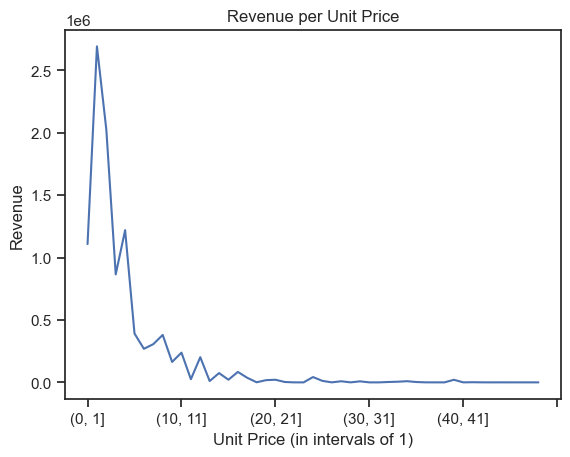

In [87]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of {})'.format(price_interval))
plt.ylabel('Revenue')
plt.title('Revenue per Unit Price');

**Make it look nicer**
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

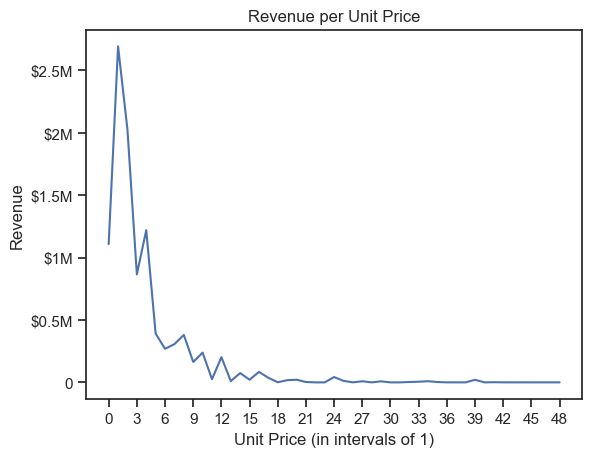

In [88]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of {})'.format(price_interval))
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start, price_end, 3), np.arange(price_start, price_end, 3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000], ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])

plt.title('Revenue per Unit Price');

Looks like a major chunk of revenue comes from items worth \\$0-\\$3.